<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


In this module we get to work with the cleaned dataset from the previous module.

In this assignment we will perform the task of exploratory data analysis.
We will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


-   Identifying the distribution of data in the dataset.

-   Identifying outliers in the dataset.

-   Removing outliers from the dataset.

-   Identifying correlation between features in the dataset.


* * *


## Hands on Lab


Importing the pandas module.


In [1]:
import pandas as pd

Loading the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [6]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [8]:
df.shape

(11398, 85)

## Distribution


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Ploting the distribution curve for the column `ConvertedComp`.


In [26]:
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

Finding out if our column has missing values

In [27]:
df['ConvertedComp'].value_counts()

2000000.0    138
1000000.0    105
100000.0      99
150000.0      92
120000.0      86
            ... 
79183.0        1
20475.0        1
288732.0       1
22056.0        1
19880.0        1
Name: ConvertedComp, Length: 3515, dtype: int64

In [28]:
df['ConvertedComp'].median()

57745.0

In [29]:
missing_comp = df['ConvertedComp'].isnull()
missing_comp.value_counts()

False    10582
True       816
Name: ConvertedComp, dtype: int64

Imputing missing values

In [30]:
df['ConvertedComp'].replace(np.nan, 57745, inplace=True)

Plotting

<AxesSubplot:ylabel='Density'>

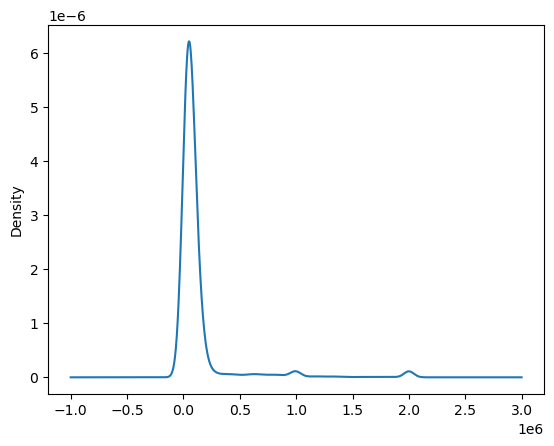

In [39]:
df['ConvertedComp'].plot(kind='kde')

Ploting the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

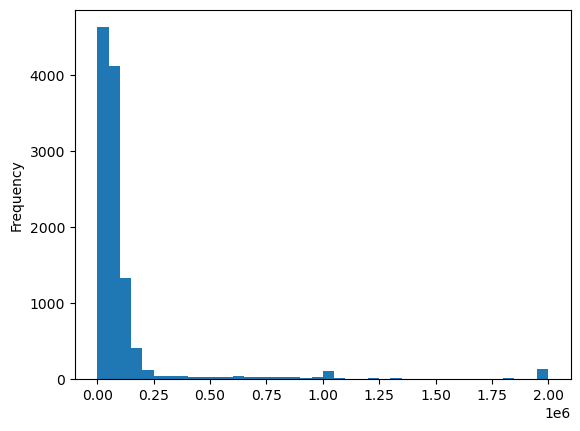

In [42]:
df['ConvertedComp'].plot(kind='hist', bins=40)

Finding out how many responders identified themselves only as a **Man**.

In [45]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Finding out the  median ConvertedComp of responders identified themselves only as a **Woman**.


In [65]:
df['ConvertedComp'][(df['Gender'] == 'Woman')].median()

57745.0

Giving the  summary for the column `Age`?


In [48]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Ploting a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

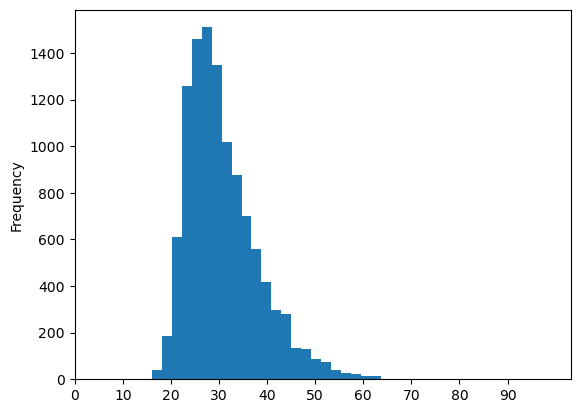

In [69]:
df['Age'].plot(kind='hist', bins=40, xticks=range(0,100,10))

## Outliers


### Finding outliers


Finding out if outliers exist in the column `ConvertedComp` using a box plot.


<AxesSubplot:>

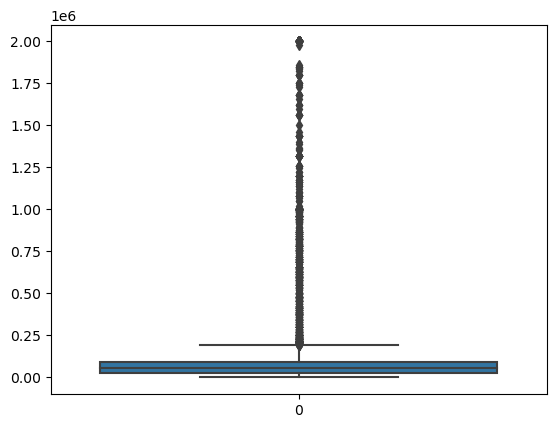

In [52]:
sns.boxplot(data = df['ConvertedComp'])

Finding out the Inter Quartile Range for the column `ConvertedComp`.


In [58]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

print('Q1', q1)
print('Q3', q3)

IQR = q3 - q1
print('IQR', IQR)

Q1 29016.0
Q3 95000.0
IQR 65984.0


Finding out the upper and lower bounds.


In [59]:
up_bound = q3 + IQR*1.5
print('Upper bound:', up_bound)

lw_bound = q1 - IQR*1.5
print('Lower bound:', lw_bound)

Upper bound: 193976.0
Lower bound: -69960.0


Identifying how many outliers are there in the `ConvertedComp` column.


In [60]:
num_outliers = 0

for conv_comp in df['ConvertedComp']:
    if (conv_comp < lw_bound) or (conv_comp > up_bound):
        num_outliers = num_outliers + 1

num_outliers

933

Creating a new dataframe by removing the outliers from the `ConvertedComp` column.


In [61]:
outl_index = df[(df.ConvertedComp < lw_bound) | (df.ConvertedComp > up_bound)].index

df_outl = df.drop(outl_index)
df_outl.shape

(10465, 85)

In [74]:
df_outl.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10465.000000,9.656000e+03,10465.000000,10348.000000,8228.000000,10199.000000
mean,12494.160057,7.274133e+05,58992.503392,41.874058,4.807974,30.621512
std,7234.905154,7.204382e+06,40544.600719,24.357563,4.643520,7.337965
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6261.000000,2.000000e+04,26424.000000,40.000000,2.000000,25.000000
50%,12485.000000,6.220000e+04,57287.000000,40.000000,4.000000,29.000000
75%,18802.000000,1.150000e+05,81000.000000,42.500000,5.000000,34.000000
max,25142.000000,3.900000e+08,192500.000000,1012.000000,99.000000,99.000000


## Correlation


### Finding correlation


Finding the correlation between `Age` and all other numerical columns.


In [62]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002468,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001031,0.003510,0.007063,0.006970
ConvertedComp,0.002468,0.001031,1.000000,0.020489,-0.034760,0.103232
WorkWeekHrs,-0.015314,0.003510,0.020489,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.034760,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.103232,0.036518,-0.020469,1.000000


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
